# **Data chapter**

Reprise de la démarche globale en effectuant une partition pertinente des données.

Pas de grande nouveauté, intégration des approches existantes en monograpies autour de chaque groupe cohérent de variables.

# Les 6 `AMT_REQ_CREDIT_BUREAU_`

$\times$ `(HOUR, DAY, WEEK, MON, QRT, YEAR)` à la fin de la table `application`


* Ce sont des 'alertes' indirectes : nombre de demandes d'information au 'Bureau', une heure, un jour, une semaine, un mois, un trimestre, un an avant la demande.
* Le nombre de NA est le même pour chacune de ces colonnes => elles sont saisies d'un bloc.
* Variable dérivées possibles :
    * somme des demandes d'information
    * feat eng : réduire aux classes 0, 1, 2 puis regrouper toutes les quantités > qui représentent moins qu'un certain seuil, par exemple de 1% ==> réduction significative du nombre de colonnes : de nombreuses colonnes sont là uniquement en raison d'outliers.


In [7]:
import locale
locale.setlocale(locale.LC_ALL, '')
x = 123456789
print(f"{x:n}")

123 456 789


In [1]:
from home_credit.load import get_application
app = get_application()
display(app)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_train.pqt
load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\application_test.pqt


application,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
0,100001,-1,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,-1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
is_amt_req_col = app.columns.str.startswith("AMT_REQ")
amt_req_cols = app.columns[is_amt_req_col]
display(amt_req_cols)
app_amt_req = app[amt_req_cols]
display(app_amt_req)

Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', name='application')

application,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0,1.0
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from home_credit.utils import help_cols
help_cols(amt_req_cols)

load C:\Users\franc\Projects\pepper_credit_scoring_tool\dataset\pqt\HomeCredit_columns_description.pqt


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|

Concerant les NA, il serait intéressant de savoir quels clients sont concernés et pourquoi.

**TODO** On pourrait rechercher la corrélation entre le fait d'être NA sur ce bloc et d'autres variables.

,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
AMT_REQ_CREDIT_BUREAU_*,,,,,,
AMT_REQ_CREDIT_BUREAU_HOUR,308687,5,47568,0.866478,0.000016,float64
AMT_REQ_CREDIT_BUREAU_DAY,308687,9,47568,0.866478,0.000029,float64
AMT_REQ_CREDIT_BUREAU_WEEK,308687,9,47568,0.866478,0.000029,float64
AMT_REQ_CREDIT_BUREAU_MON,308687,24,47568,0.866478,0.000078,float64
AMT_REQ_CREDIT_BUREAU_QRT,308687,11,47568,0.866478,0.000036,float64
AMT_REQ_CREDIT_BUREAU_YEAR,308687,25,47568,0.866478,0.000081,float64


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/discrete_stats/discrete_stats_amt_req_credit_bureau__2023_04_11_06_24_40_600295.png)


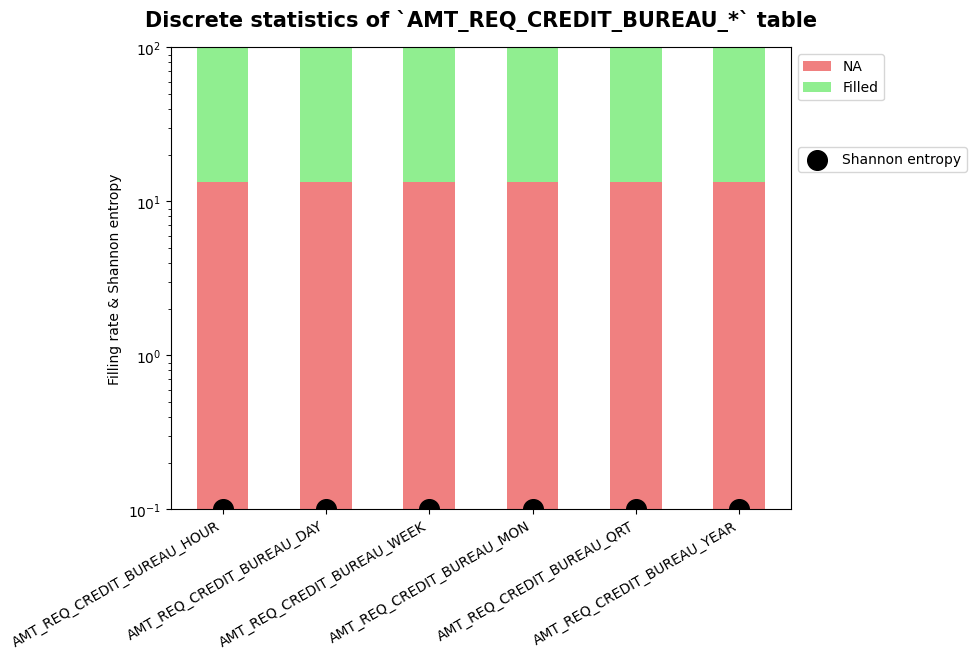

In [4]:
from pepper.utils import show_discrete_stats
show_discrete_stats(app_amt_req, f"AMT_REQ_CREDIT_BUREAU_*")

**TODO** Faire mon propre countplot qui intègre mon innovation `agg_value_counts`.

Cette innovation sera également à utiliser dans le cadre de mon feature engineering : c'est une stratégie de réduction de longue traine par agégation de classes de grain trop fin pour être individuellement pertinentes.

In [70]:
from pepper.univar import agg_value_counts

s = app_amt_req.AMT_REQ_CREDIT_BUREAU_MON.dropna().astype(int)
display(agg_value_counts(s))
display(agg_value_counts(s, agg=True))
display(agg_value_counts(s, agg=.15))

,count,proportion
AMT_REQ_CREDIT_BUREAU_MON,,
0,264574.0,0.857095
1,33471.0,0.108430
2,5409.0,0.017523
3,1995.0,0.006463
4,1077.0,0.003489
5:27,2161.0,0.007001


,count,proportion
AMT_REQ_CREDIT_BUREAU_MON,,
0,264574.0,0.857095
1,33471.0,0.108430
2,5409.0,0.017523
3:27,5233.0,0.016952


,count,proportion
AMT_REQ_CREDIT_BUREAU_MON,,
0,264574.0,0.857095
1:27,44113.0,0.142905


In [74]:
import pandas as pd
abs_vc = s.value_counts()
rel_vc = s.value_counts(normalize=True)
vc = pd.concat([abs_vc, rel_vc], axis=1)
display(vc)

,count,proportion
AMT_REQ_CREDIT_BUREAU_MON,,
0,264574,0.857095
1,33471,0.108430
2,5409,0.017523
3,1995,0.006463
4,1077,0.003489
5,603,0.001953
6,344,0.001114
7,298,0.000965
9,206,0.000667



AMT_REQ_CREDIT_BUREAU_HOUR


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|_|

AMT_REQ_CREDIT_BUREAU_HOUR,0,1,2,3,4:4
count,306972.000000,1648.000000,57.000000,9.000000,1.000000
proportion,0.994444,0.005339,0.000185,0.000029,0.000003


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_hour_2023_04_11_12_53_06_790830.png)


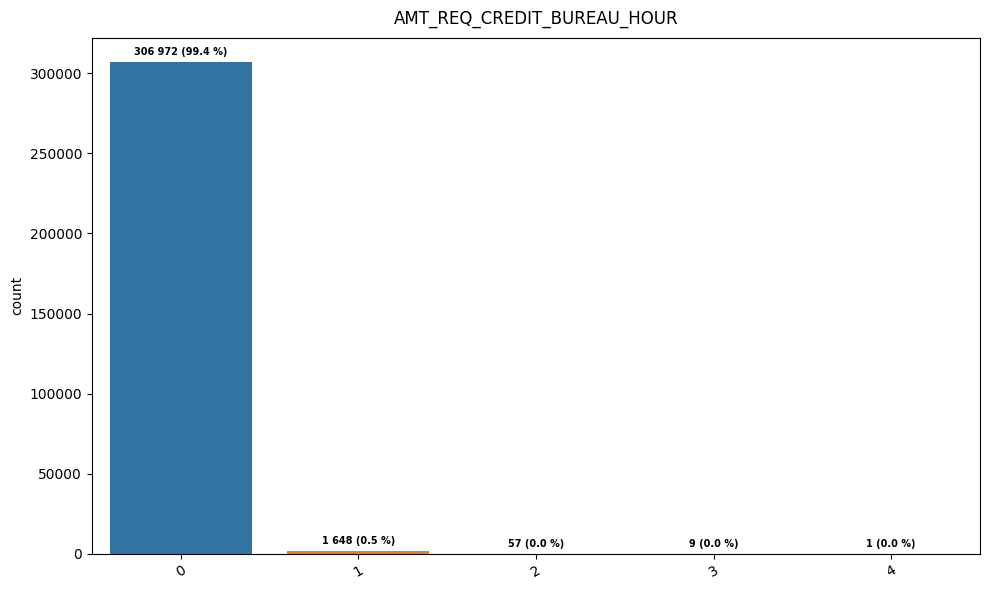


AMT_REQ_CREDIT_BUREAU_DAY


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|_|

AMT_REQ_CREDIT_BUREAU_DAY,0,1,2,3:9
count,307128.00000,1355.00000,113.000000,91.000000
proportion,0.99495,0.00439,0.000366,0.000295


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_day_2023_04_11_12_53_07_819374.png)


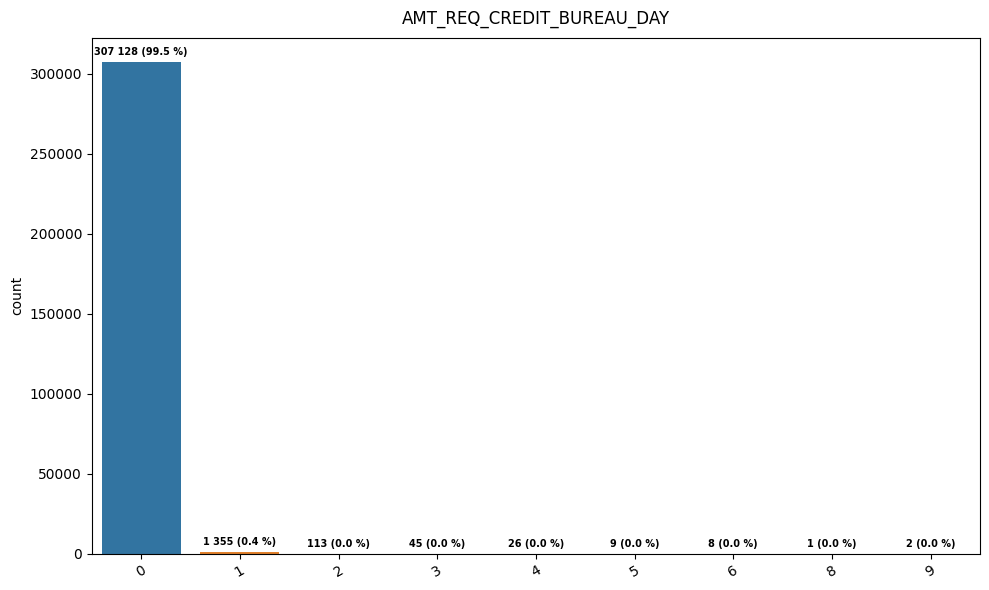


AMT_REQ_CREDIT_BUREAU_WEEK


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|_|

AMT_REQ_CREDIT_BUREAU_WEEK,0,1,2,3:8
count,300035.000000,8321.000000,202.000000,129.000000
proportion,0.971972,0.026956,0.000654,0.000418


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_week_2023_04_11_12_53_08_829382.png)


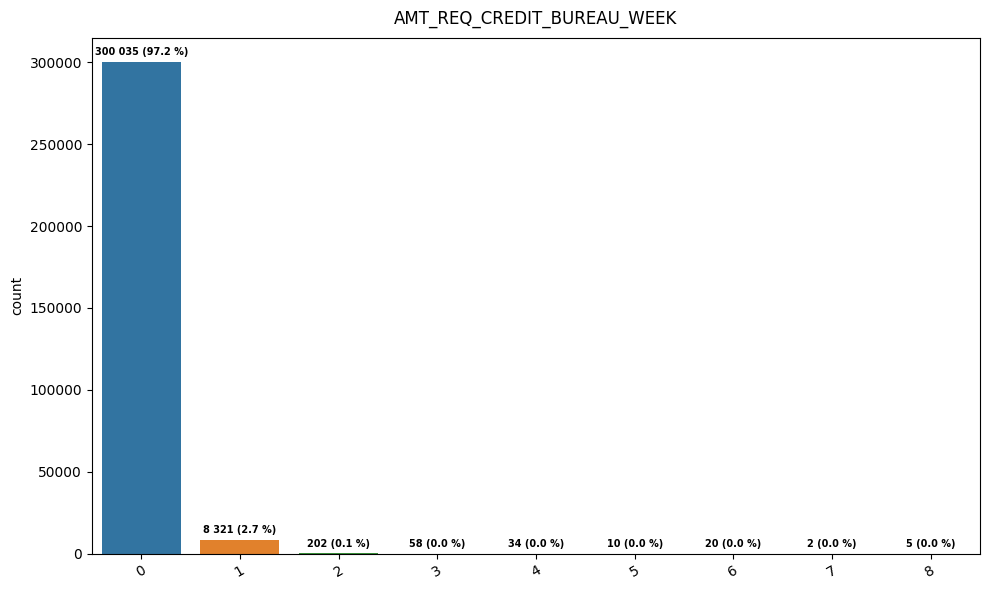


AMT_REQ_CREDIT_BUREAU_MON


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|_|

AMT_REQ_CREDIT_BUREAU_MON,0,1,2,3:27
count,264574.000000,33471.00000,5409.000000,5233.000000
proportion,0.857095,0.10843,0.017523,0.016952


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_mon_2023_04_11_12_53_09_751417.png)


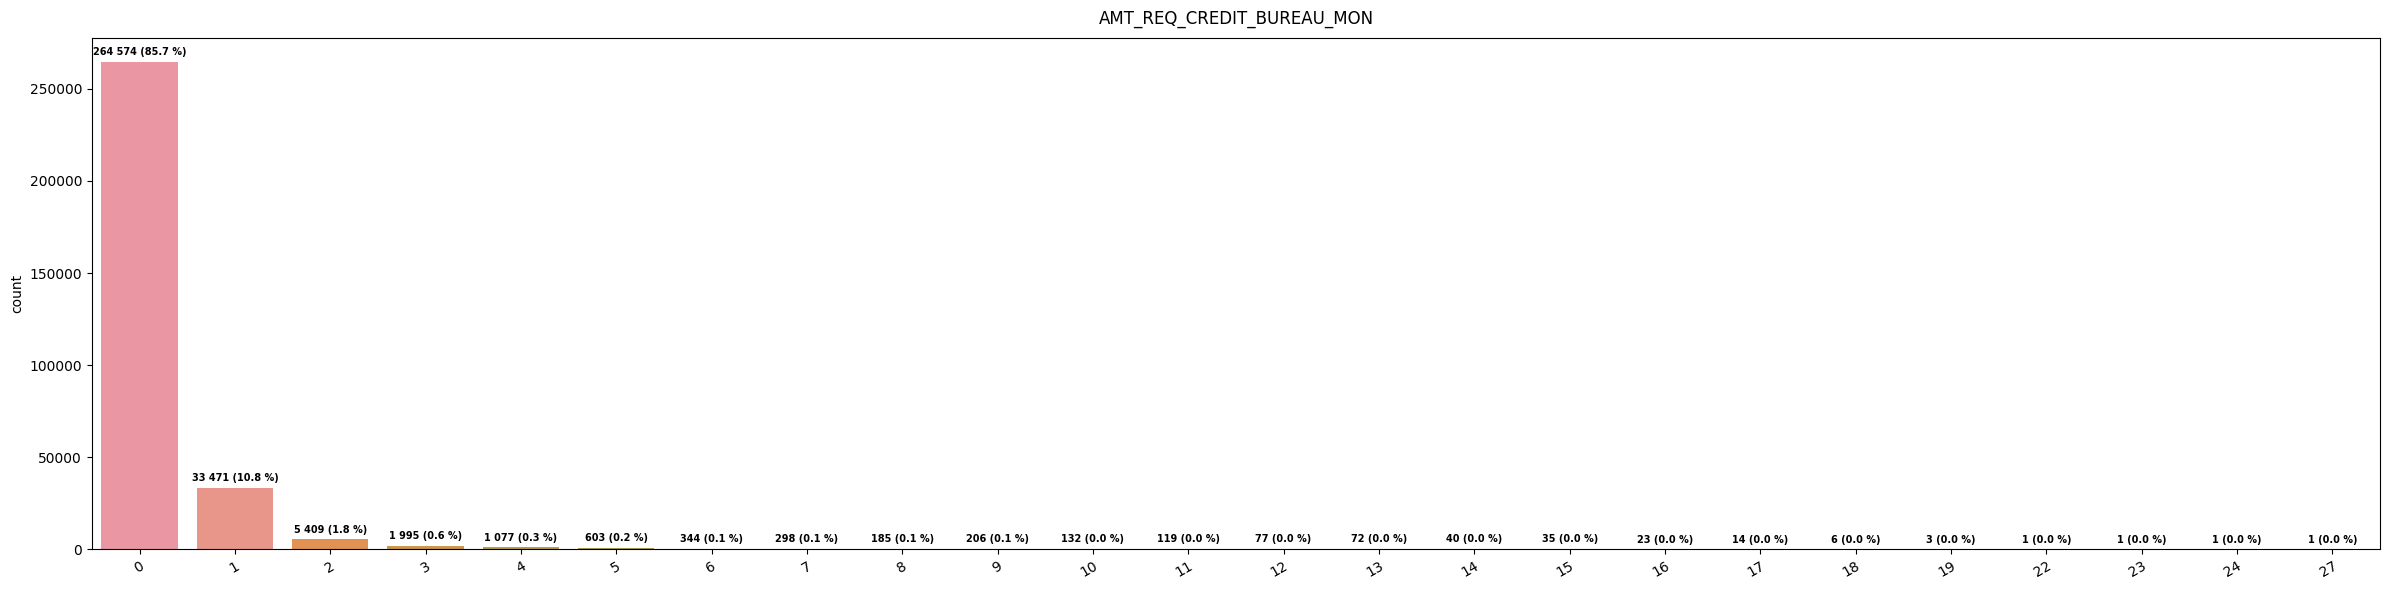


AMT_REQ_CREDIT_BUREAU_QRT


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|_|

AMT_REQ_CREDIT_BUREAU_QRT,0,1,2,3,4,5,6,7:261
count,238976.000000,49435.000000,17410.0000,2212.000000,533.000000,75.000000,29.000000,17.000000
proportion,0.774169,0.160146,0.0564,0.007166,0.001727,0.000243,0.000094,0.000055


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_qrt_2023_04_11_12_53_11_356865.png)


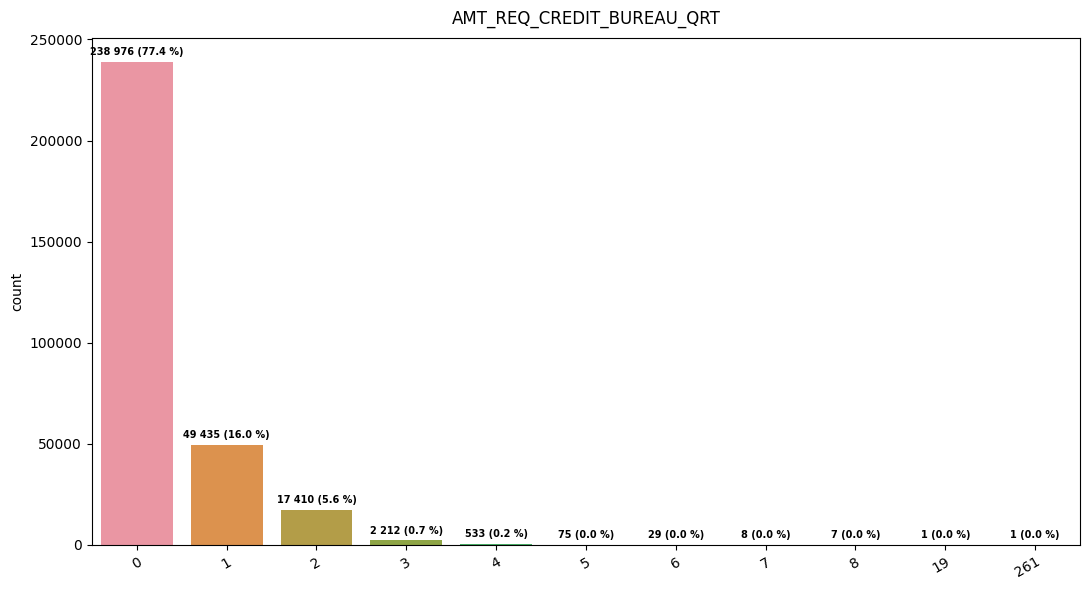


AMT_REQ_CREDIT_BUREAU_YEAR


Table|Column|Description|Special|
---|---|---|---|
application_{train\|test}|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|_|

AMT_REQ_CREDIT_BUREAU_YEAR,0:25
count,308687.0
proportion,1.0


save_and_show_savefig(C:\Users\franc\Projects\pepper_credit_scoring_tool\img/dataxplor/cat_modalities_counts_amt_req_credit_bureau_year_2023_04_11_12_53_12_605888.png)


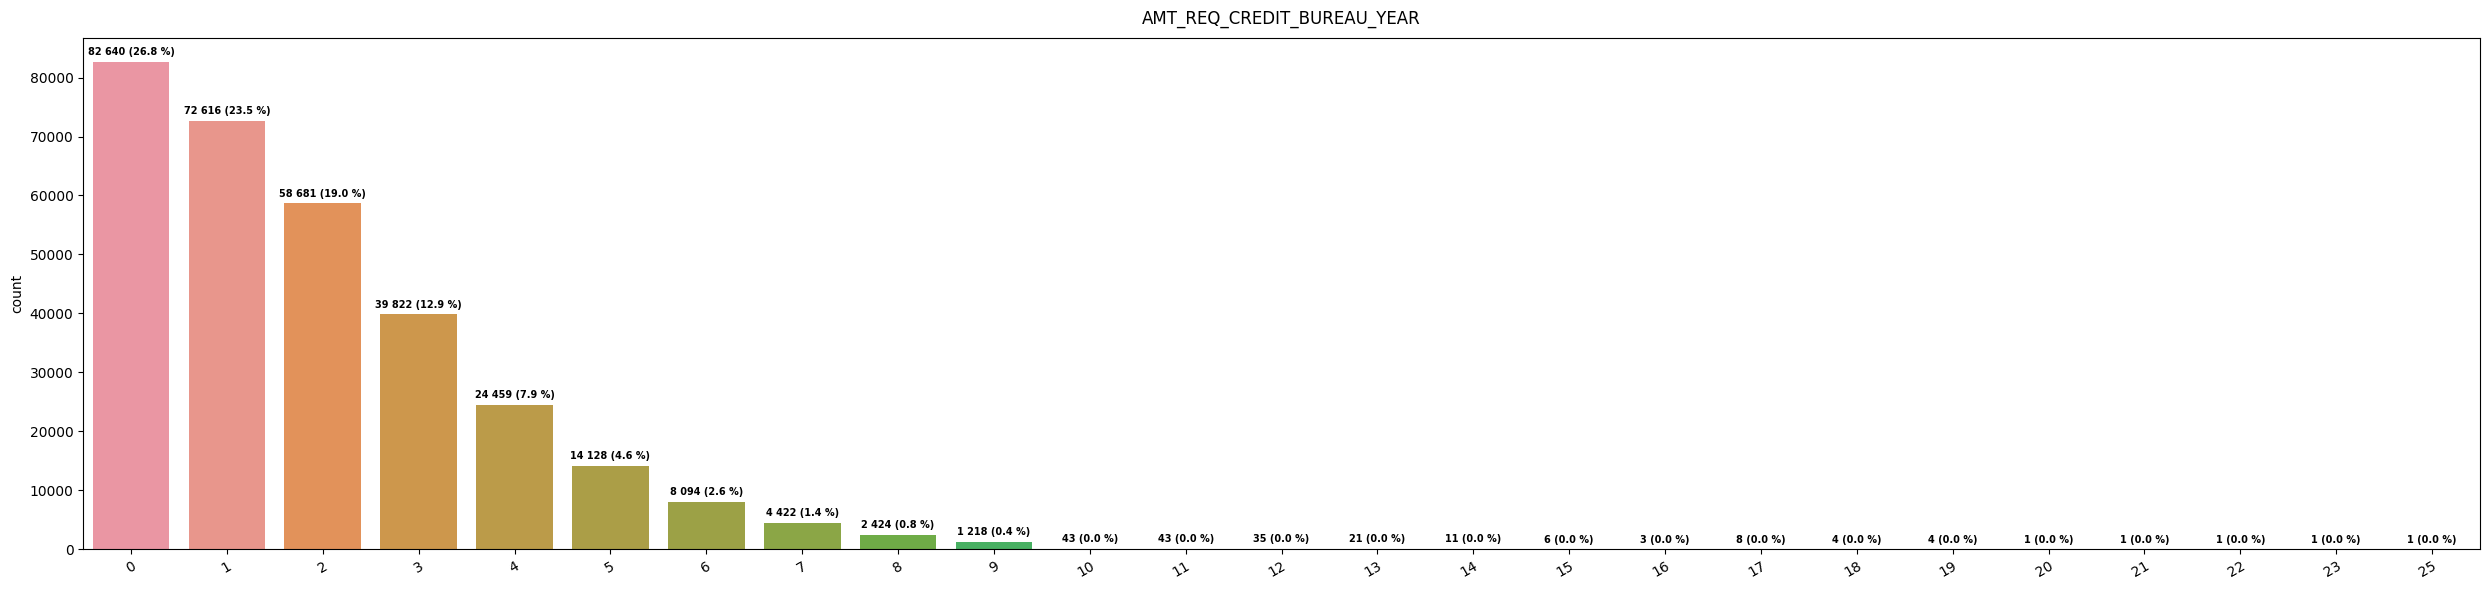

In [71]:
from home_credit.plots import show_cat_mod_counts
from pepper.utils import print_subtitle
from pepper.univar import agg_value_counts

notna_app_amt_req = app_amt_req.dropna().astype(int)

for cat in amt_req_cols:
    #show_cat_mod_counts_gallery(app, mod_11_30_cats.index, ncols=2)
    print_subtitle(cat)
    help_cols(cat)
    # display(notna_app_amt_req[cat].value_counts())
    display(agg_value_counts(notna_app_amt_req[cat], agg=True).T)
    order = None
    if notna_app_amt_req[cat].dtype in [str, object]:
        order = notna_app_amt_req[cat].value_counts().index
        display(order)
    show_cat_mod_counts(
        notna_app_amt_req[cat],
        order=order
        # order auto pour les ordinaux
        # order=["MONDAY", "TUESDAY", "WEDNESDAY", "THURSDAY", "FRIDAY", "SATURDAY", "SUNDAY"]
    )

# 